In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_x=pd.read_csv("./Datasets/Locally Weighted Regression/weightedX.csv")
data_y=pd.read_csv("./Datasets/Locally Weighted Regression/weightedY.csv")
print(data_x.shape)
print(data_y.shape)

(99, 1)
(99, 1)


In [3]:
X=data_x.values
Y=data_y.values

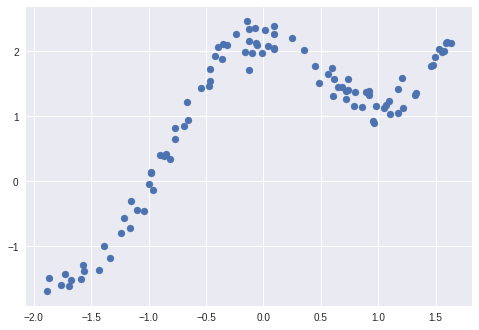

In [4]:
plt.style.use("seaborn")
u=X.mean()
std=X.std()
X=(X-u)/std
plt.scatter(X,Y)

In [5]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))

In [6]:
X.shape

(99, 2)

In [7]:
def weight(x,query_x,t):
    return np.exp(np.dot((query_x-x).T,(query_x-x))/(-2*t*t))
def closed_form_sol_weighted(X,Y,query_x,tau):
    X_trans=np.transpose(X)
    Y_trans=np.transpose(Y)
    a=[weight(X[i],query_x,tau) for i in range(X.shape[0])]
    w=np.diag(a)
    theta=(np.linalg.pinv(np.dot(X_trans,w).dot(X))).dot(np.dot(X_trans,w).dot(Y))
    return theta
def hypothesis(theta,x):
    return np.dot(theta,x)
def score(X,Y,Y_pred):
    ss_tot=0
    ss_res=0
    y_mean=np.mean(Y)
    for i in range(Y.shape[0]):
        ss_res=ss_res+(Y[i]-Y_pred[i])**2
        ss_tot=ss_tot+(Y[i]-y_mean)**2
    return 1-ss_res/ss_tot

In [8]:
res=[]
for i in range(X.shape[0]):
    a=closed_form_sol_weighted(X,Y,X[i],0.01)
    a=a.transpose()
    res.append(hypothesis(a,X[i,:]))
res=np.asarray(res)
res.shape

(99, 1)

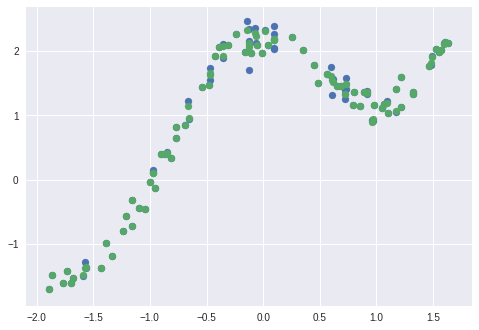

In [9]:
plt.scatter(X[:,1],Y)
plt.scatter(X[:,1],res)

In [10]:
print("The validation score is {0:.3f}".format(float(score(X,Y,res))))

The validation score is 0.997


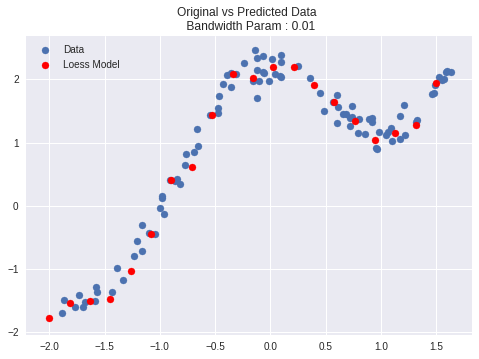

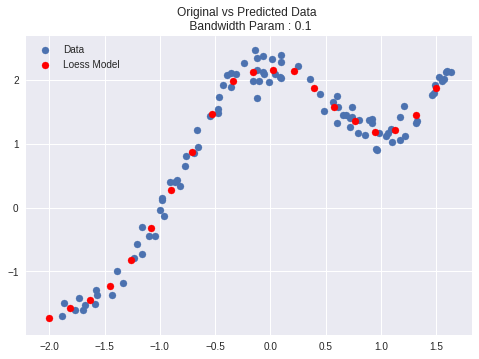

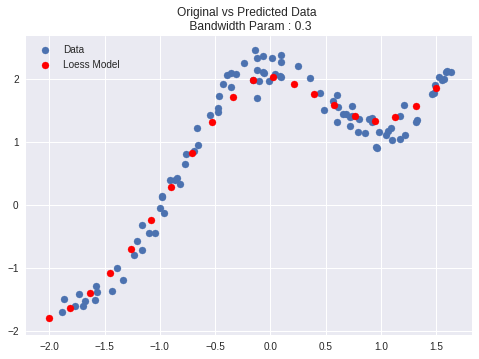

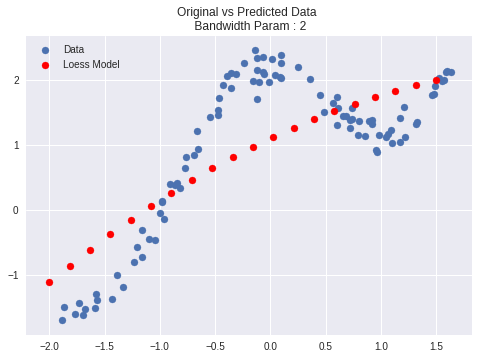

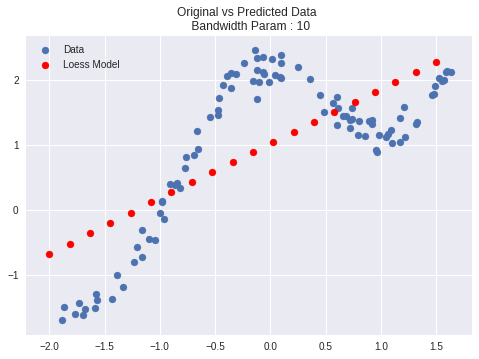

In [11]:
#Test Function
def LocallyWeightedTest(tau):
    x_test = np.linspace(-2,1.5,20)
    x_test = np.asarray(x_test)
    y_test = []
    for i in x_test:
        ones=np.ones((1,))
        i=i.reshape(1,)
        i=np.hstack((ones,i))
        a=closed_form_sol_weighted(X,Y,i,tau)
        a=a.transpose()
        
        y_test.append(hypothesis(a,i))
    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)
    #print(y_test.shape)
    plt.figure(0)
    plt.scatter(X[:,1],Y,label="Data")
    
    y_test = y_test.reshape((20,))
    plt.scatter(x_test,y_test,c='r',label="Loess Model")
    plt.title("Original vs Predicted Data \n Bandwidth Param : {}".format(tau))
    plt.legend()
    plt.show()
    
for i in [0.01,0.1,0.3,2,10]:
    LocallyWeightedTest(i)



In [12]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [13]:
np.mat(np.eye(5))

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])